<a href="https://colab.research.google.com/github/20arnav/OOPs-Project-Group-6/blob/main/cifar10_imageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import datasets,models,layers

In [19]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [20]:
Y_train.shape
Y_train = Y_train.reshape(-1,) #flattening the Y_train shape for easier working
Y_test = Y_test.reshape(-1,)
Y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [21]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [22]:
def show_sample(X_train,Y_train,index): 
  plt.figure(figsize = (15,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[Y_train[index]])

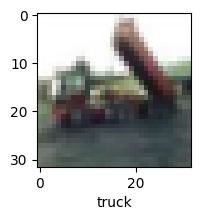

In [23]:
show_sample(X_train, Y_train, 2)

In [ ]:
X_train/255  #normalizing the RGB pixel values to 0 to 1 from 0 to 255
X_test/255

In [26]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
  ])

In [28]:
from keras.engine.training import optimizer
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [29]:
cnn.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.8962 - accuracy: 0.4117
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.2602 - accuracy: 0.5563
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1124 - accuracy: 0.6126
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0110 - accuracy: 0.6501
Epoch 5/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.9320 - accuracy: 0.6797
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8541 - accuracy: 0.7028
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8015 - accuracy: 0.7238
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7546 - accuracy: 0.7369
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7047 - accuracy: 0.7532
Epoch 10/10
1563/1563 [==============================] - 63s 41m

In [30]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.1492 - accuracy: 0.6564


[1.149153232574463, 0.6564000248908997]

In [33]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 4s 11ms/step


In [34]:
y_classes = [np.argmax(element) for element in y_pred]

In [39]:
y_classes[:10]

[3, 8, 8, 0, 6, 6, 9, 6, 7, 1]

In [40]:
Y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

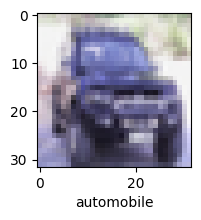

In [47]:
show_sample(X_test, Y_test,9)

In [46]:
classes[y_classes[9]]

'automobile'

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report: \n", classification_report(Y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.75      0.70      1000
           1       0.80      0.75      0.78      1000
           2       0.68      0.38      0.49      1000
           3       0.53      0.39      0.45      1000
           4       0.53      0.70      0.60      1000
           5       0.55      0.58      0.57      1000
           6       0.65      0.80      0.72      1000
           7       0.67      0.70      0.69      1000
           8       0.77      0.76      0.76      1000
           9       0.77      0.76      0.76      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000

